In [19]:
# Importing the pandas library, which is essential for data manipulation and analysis
import pandas as pd

# Reading data from a CSV file named 'Competition_Data.csv' into a pandas DataFrame.
# The pd.read_csv() function is used to load the dataset for further analysis.
pricing_data = pd.read_csv('Competition_Data.csv')
print(pricing_data.head())


   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [20]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


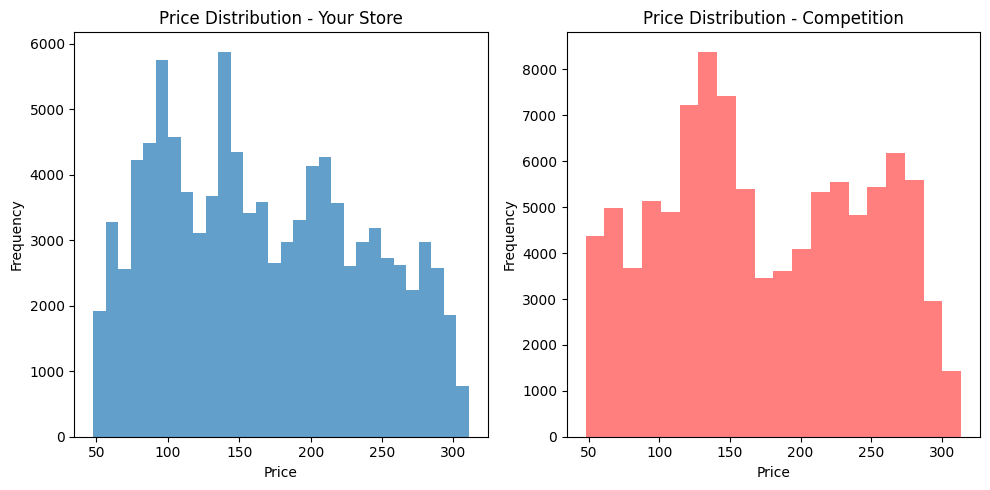

In [21]:
# Importing the required matplotlib library for data visualization
import matplotlib.pyplot as plt

# Creating a figure with a specified size of 10x5 inches
plt.figure(figsize=(10, 5))

# Creating the first subplot (1 row, 2 columns, and selecting the first subplot)
plt.subplot(1, 2, 1)

# Creating a histogram of the 'Price' column from the pricing_data DataFrame
# 'bins=30' defines the number of bins, 'alpha=0.7' sets the transparency
# 'label' gives a label for this dataset
plt.hist(pricing_data['Price'], bins=30, alpha=0.7, label='Your Store')

# Adding labels and a title to the first subplot
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Price Distribution - Your Store')  # Title of the first subplot

# Creating the second subplot (1 row, 2 columns, and selecting the second subplot)
plt.subplot(1, 2, 2)

# Creating a histogram for the 'Competition_Price' column with different settings
# 'bins=20' specifies the number of bins, 'alpha=0.5' adjusts the transparency
# 'color' sets the color to red, and 'label' is used to specify the label for this dataset
plt.hist(pricing_data['Competition_Price'], bins=20, alpha=0.5, color='red', label='Competition')

# Adding labels and a title to the second subplot
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Price Distribution - Competition')  # Title of the second subplot

# Adjusting the layout to avoid overlapping between subplots
plt.tight_layout()

# Displaying the plot on the screen
plt.show()


It shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.


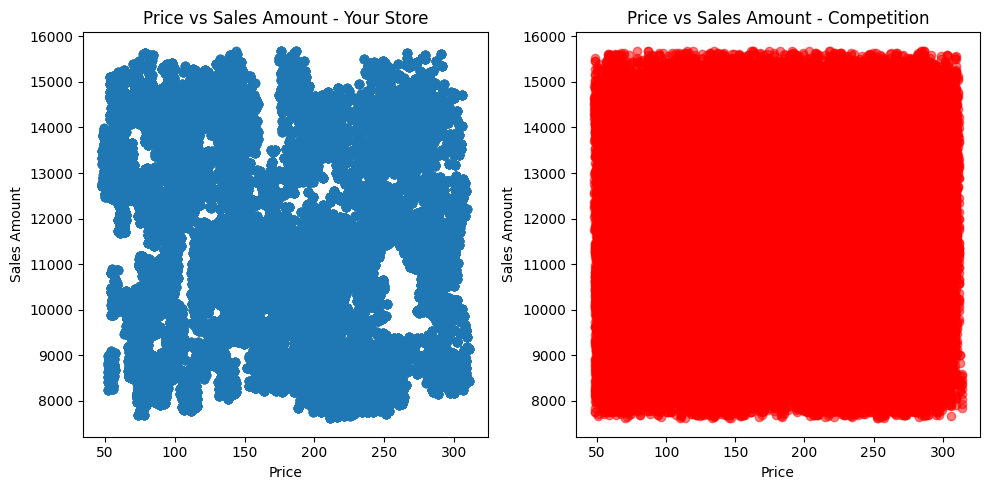

In [22]:
# Importing the necessary matplotlib library for plotting
import matplotlib.pyplot as plt

# Creating a figure with a specified size of 10x5 inches for both subplots
plt.figure(figsize=(10, 5))

# Creating the first subplot (1 row, 2 columns, and selecting the first subplot)
plt.subplot(1, 2, 1)

# Creating a scatter plot with 'Price' on the x-axis and 'Sales_Amount' on the y-axis
# 'alpha=0.7' sets the transparency level and 'label' gives a label for this dataset
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha=0.7, label='Your Store')

# Adding labels and a title for the first subplot
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Sales Amount')  # Label for the y-axis
plt.title('Price vs Sales Amount - Your Store')  # Title of the first subplot

# Creating the second subplot (1 row, 2 columns, and selecting the second subplot)
plt.subplot(1, 2, 2)

# Creating a scatter plot for 'Competition_Price' against 'Sales_Amount'
# 'alpha=0.5' adjusts transparency, 'color' is set to red, and 'label' indicates the dataset
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha=0.5, color='red', label='Competition')

# Adding labels and a title for the second subplot
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Sales Amount')  # Label for the y-axis
plt.title('Price vs Sales Amount - Competition')  # Title of the second subplot

# Adjusting layout to prevent overlapping between subplots
plt.tight_layout()

# Displaying the plot
plt.show()


The scatter plots compare the relationship between price and sales amount for our store (left) and the competition (right). For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

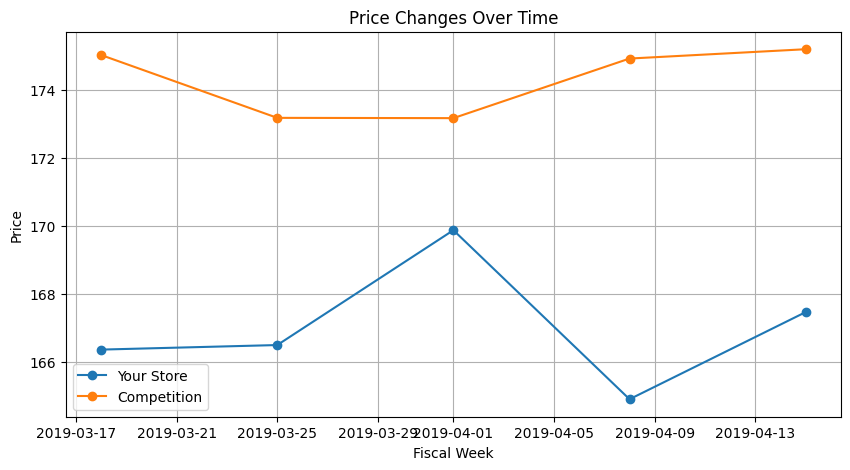

In [23]:
# Converting the 'Fiscal_Week_ID' column to a proper datetime format using pd.to_datetime()
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

# Grouping the data by 'Fiscal_Week_ID' and calculating the average price for each week for both 'Price' and 'Competition_Price'.
weekly_prices = pricing_data.groupby(['Fiscal_Week_ID']).agg({'Price': 'mean', 'Competition_Price': 'mean'}).reset_index()

# Creating a new figure with a size of 10x5 inches for the line plot
plt.figure(figsize=(10, 5))

# Plotting the average price of 'Your Store' over time. 
# 'marker="o"' adds circular markers to indicate data points.
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Your Store', marker='o')

# Plotting the average competition price over time with circular markers for data points
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o')

# Adding labels to the x-axis and y-axis and setting the title for the plot
plt.xlabel('Fiscal Week')  # Label for the x-axis representing time (fiscal weeks)
plt.ylabel('Price')  # Label for the y-axis representing average price
plt.title('Price Changes Over Time')  # Title of the plot

# Adding a legend to distinguish between the two lines (Your Store vs. Competition)
plt.legend()

# Adding grid lines to the plot to make it easier to read
plt.grid(True)

# Displaying the final plot
plt.show()


The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, our store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while our store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

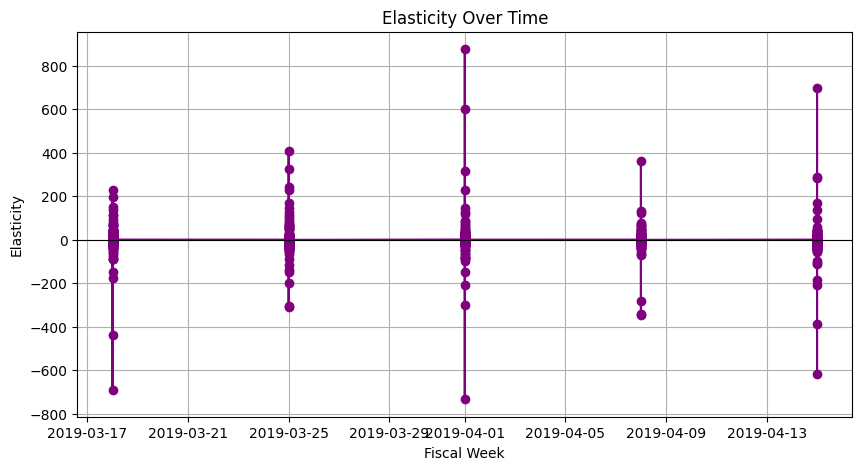

In [24]:
# Calculating the percentage change in 'Price' for each row and storing it in a new column 'price_change'
pricing_data['price_change'] = pricing_data['Price'].pct_change()

# Calculating the percentage change in 'Item_Quantity' for each row and storing it in 'qty_change'
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

# Calculating the price elasticity of demand, which is the ratio of quantity change to price change
# Storing the result in a new column called 'elasticity'
pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

# Replacing infinite values (positive or negative infinity) with NaN since they are not useful
pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Dropping rows where 'elasticity' has NaN values to clean the data
pricing_data.dropna(subset=['elasticity'], inplace=True)

# Creating a figure with a size of 10x5 inches to visualize elasticity over time
plt.figure(figsize=(10, 5))

# Plotting the 'elasticity' over time (against 'Fiscal_Week_ID')
# 'marker="o"' adds circular markers, 'linestyle="-" ' creates a line, and color is set to purple
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker='o', linestyle='-', color='purple')

# Adding a horizontal line at y=0 to visually distinguish between positive and negative elasticity
plt.axhline(0, color='black', linewidth=0.8)

# Adding labels and a title to the plot
plt.xlabel('Fiscal Week')  # Label for the x-axis (Fiscal Week)
plt.ylabel('Elasticity')  # Label for the y-axis (Elasticity)
plt.title('Elasticity Over Time')  # Title of the plot

# Adding grid lines to enhance readability
plt.grid(True)

# Displaying the plot on the screen
plt.show()


The graph shows the price elasticity of demand over time. It highlights significant variability in elasticity across different weeks, with values ranging from highly negative to highly positive. It indicates that the sensitivity of quantity demanded to price changes fluctuates considerably. High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicates a sharp drop in demand with price hikes. The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.


In [25]:
# Calculating the total sales for 'Your Store' by summing the 'Sales_Amount' column
total_sales_youyr_store = pricing_data['Sales_Amount'].sum()

# Calculating the total sales for 'Competition'

total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

# Calculating the total quantity of items sold in 'Your Store' by summing the 'Item_Quantity' column
total_qty_your_store = pricing_data['Item_Quantity'].sum()

# Calculating the total quantity of items sold by the competition
# Since both quantities are likely measured the same way, it should just sum 'Item_Quantity'.
total_qty_competition = pricing_data['Item_Quantity'].sum()

# Creating a summary DataFrame to display the total sales and total quantity for both
# 'Your Store' and 'Competition' as a summary table
summary = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Quantity'],  # Labels for the metrics
    'Your Store': [total_sales_youyr_store, total_qty_your_store],  # Values for 'Your Store'
    'Competition': [total_sales_competition, total_qty_competition]  # Values for 'Competition'
})

# Displaying the summary DataFrame
summary


,Metric,Your Store,Competition
0,Total Sales,1.141005e+08,6.962097e+08
1,Total Quantity,3.984776e+06,3.984776e+06


Our store’s total sales amount is 114,100,500, whereas the competition’s total sales amount is 696,209,700 (assuming equal quantity sold). The competition has a significantly higher total sales amount compared to our store. It indicates that their pricing strategy is more effective in generating revenue.

In [26]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

/var/folders/nz/j5j7_zw9067gjjs15nmnsz8m0000gn/T/ipykernel_9144/3558824510.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
/var/folders/nz/j5j7_zw9067gjjs15nmnsz8m0000gn/T/ipykernel_9144/3558824510.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


In [27]:
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

/var/folders/nz/j5j7_zw9067gjjs15nmnsz8m0000gn/T/ipykernel_9144/2941317040.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
/var/folders/nz/j5j7_zw9067gjjs15nmnsz8m0000gn/T/ipykernel_9144/2941317040.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
/var/folders/nz/j5j7_zw9067gjjs15nmnsz8m0000gn/T/ipykernel_9144/2941317040.py:20: SettingWithCopyWarning: 
A value is 

,segment,avg_elasticity
0,Medium,0.154444
1,High,0.148043


In the above code, we are segmenting customers based on their purchasing behaviour by analyzing the average price and total quantity sold for each item. First, we calculated the average price and total quantity sold for each item and merged this summary back into the main dataset. 

We then defined customer segments based on these average prices into three categories: Low, Medium, and High. For each segment, we calculated the price elasticity of demand by measuring how the percentage change in price affects the percentage change in quantity sold. Finally, we computed the average elasticity for each segment, which provides insights into how sensitive each segment is to price changes. 

This helps in understanding and optimizing pricing strategies for different customer segments.
The “High” segment has an average elasticity of 0.143993, indicating that these customers are more sensitive to price changes. In contrast, the “Medium” segment has a lower average elasticity of 0.071118, suggesting they are less responsive to price variations.


In [28]:
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In the above code, we are simulating the impact of a dynamic pricing strategy on sales performance. First, we created a copy of the dataset for the simulation. We then applied dynamic pricing rules by increasing prices by 5% for the Medium segment and decreasing prices by 10% for the High segment. Then, we calculated new sales amounts based on these dynamic prices. Next, we compared the total sales amount and total quantity sold under the existing pricing and the dynamic pricing strategies.

In [29]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

So, this is how we can use the concept of price optimization to optimize prices for a product or service. Price optimization is a strategic approach that uses data collection on sales, costs, competition, and market trends to predict demand changes and analyze price elasticity, which enables businesses to set optimal prices.